In [93]:
# Import of libraries and models:
#%pip install numpy
import numpy as np
#%pip install pandas
import pandas as pd

In [94]:
# Data output configuration:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [95]:
# Loading and processing data:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Data_Online_Retail/online_retail_Year_2009-2011.csv', encoding='1251')

In [96]:
# View the Top-3 items:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom


In [97]:
# Adding a new column:
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y')

In [98]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009


In [99]:
# The display of columns:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year'],
      dtype='object')

In [100]:
# Entering columns in a variable:
our_cols = ['InvoiceDate', 'Year', 'Invoice', 'StockCode', 'Description', 'Customer ID', 'Country', 'Price', 'Quantity']

In [101]:
df = df[our_cols]

In [102]:
df.head(1)

,InvoiceDate,Year,Invoice,StockCode,Description,Customer ID,Country,Price,Quantity
0,2009-12-01 07:45:00,2009,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,13085.00,United Kingdom,6.95,12


In [103]:
# Renaming columns:
df.columns = ['invoice_date', 'year', 'invoice', 'stock_code', 'description', 'customer_id', 'country', 'price', 'quantity']

In [104]:
df.head(1)

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity
0,2009-12-01 07:45:00,2009,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,13085.00,United Kingdom,6.95,12


In [105]:
# View data types:
df.dtypes

invoice_date     object
year             object
invoice          object
stock_code       object
description      object
customer_id     float64
country          object
price           float64
quantity          int64
dtype: object

In [106]:
# View shape df:
df.shape

(1067371, 9)

In [107]:
# View size df:
df.size

9606339

In [108]:
# View general information according to data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   invoice_date  1067371 non-null  object 
 1   year          1067371 non-null  object 
 2   invoice       1067371 non-null  object 
 3   stock_code    1067371 non-null  object 
 4   description   1062989 non-null  object 
 5   customer_id   824364 non-null   float64
 6   country       1067371 non-null  object 
 7   price         1067371 non-null  float64
 8   quantity      1067371 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 73.3+ MB


In [109]:
# View descriptive statistics df:
df.describe()

,customer_id,price,quantity
count,824364.00,1067371.00,1067371.00
mean,15324.64,4.65,9.94
std,1697.46,123.55,172.71
min,12346.00,-53594.36,-80995.00
25%,13975.00,1.25,1.00
50%,15255.00,2.10,3.00
75%,16797.00,4.15,10.00
max,18287.00,38970.00,80995.00


In [110]:
# Data filtration:
df = df[(df.loc[:, 'quantity'] > 0) & (df.loc[:, 'price'] > 0) & (df.loc[:, 'year'] == '2010')]

In [111]:
# View unique values
df['year'].unique()

array(['2010'], dtype=object)

In [112]:
df.head(1)

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity
45228,2010-01-04 09:24:00,2010,493410,TEST001,This is a test product.,12346.00,United Kingdom,4.50,5


In [113]:
# Removing the canceled orders:
df = df[~df['invoice'].str.startswith('C')]


In [114]:
# View descriptive statistics df:
df.describe()

,customer_id,price,quantity
count,403067.00,509088.00,509088.00
mean,15370.54,4.30,11.32
std,1685.11,66.64,86.17
min,12346.00,0.00,1.00
25%,13995.00,1.25,1.00
50%,15325.00,2.10,3.00
75%,16834.00,4.21,10.00
max,18287.00,25111.09,19152.00


In [115]:
# Search for missing values:
df.isna().any()

invoice_date    False
year            False
invoice         False
stock_code      False
description     False
customer_id      True
country         False
price           False
quantity        False
dtype: bool

In [116]:
# View for missing values:
df[df.isna().values.any(axis=1)]

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity
45231,2010-01-04 09:54:00,2010,493413,21724,PANDA AND BUNNIES STICKER SHEET,NaN,United Kingdom,0.85,1
45232,2010-01-04 09:54:00,2010,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,NaN,United Kingdom,3.75,1
45233,2010-01-04 09:54:00,2010,493413,21723,ALPHABET HEARTS STICKER SHEET,NaN,United Kingdom,0.85,1
45710,2010-01-04 14:48:00,2010,493485,72008,FROSTED BOX 9 WHITE T-LIGHT CANDLES,NaN,United Kingdom,0.42,24
45711,2010-01-04 14:48:00,2010,493485,21589,SWALLOW GIANT TUBE MATCHES,NaN,United Kingdom,2.55,2
...,...,...,...,...,...,...,...,...,...
567937,2010-12-23 16:49:00,2010,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,NaN,United Kingdom,1.25,1
567938,2010-12-23 16:49:00,2010,539991,72741,GRAND CHOCOLATECANDLE,NaN,United Kingdom,1.45,4
567939,2010-12-23 17:41:00,2010,539992,21470,FLOWER VINE RAFFIA FOOD COVER,NaN,United Kingdom,3.75,1
567940,2010-12-23 17:41:00,2010,539992,22258,FELT FARM ANIMAL RABBIT,NaN,United Kingdom,1.25,1


In [117]:
# Import of visualization libraries:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='price'>

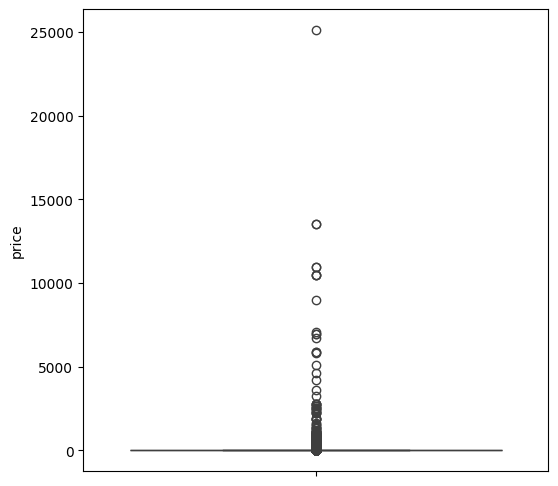

In [118]:
# Evaluation of emissions (boxplot):
plt.figure(figsize=(6, 6))
sns.boxplot(df['price'])

In [119]:
df[df.loc[:, 'price'] > 1000]

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity
62735,2010-01-19 17:49:00,2010,494918,DOT,DOTCOM POSTAGE,NaN,United Kingdom,1081.70,1
65449,2010-01-22 09:40:00,2010,495235,M,Manual,14156.00,EIRE,1193.89,1
71077,2010-01-26 17:25:00,2010,495798,ADJUST,Adjustment by john on 26/01/2010 17,NaN,United Kingdom,5117.03,1
74356,2010-01-29 11:04:00,2010,496115,M,Manual,17949.00,United Kingdom,8985.60,1
91068,2010-02-15 12:31:00,2010,497952,M,Manual,12380.00,Belgium,1508.65,1
129903,2010-03-19 11:35:00,2010,501766,M,Manual,15760.00,Norway,6958.17,1
129987,2010-03-19 11:45:00,2010,501768,M,Manual,15760.00,Norway,6958.17,1
130004,2010-03-19 11:56:00,2010,501772,M,Manual,NaN,United Kingdom,5795.87,1
135013,2010-03-23 15:22:00,2010,502263,M,Manual,12918.00,United Kingdom,10953.50,1
135015,2010-03-23 15:28:00,2010,502265,M,Manual,NaN,United Kingdom,10953.50,1


<Axes: ylabel='quantity'>

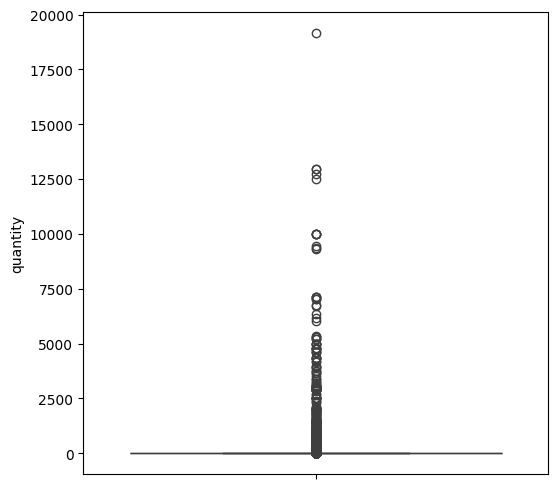

In [120]:
# Evaluation of emissions (boxplot):
plt.figure(figsize=(6, 6))
sns.boxplot(df['quantity'])

In [121]:
df[df.loc[:, 'quantity'] > 1500]

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity
65077,2010-01-21 15:11:00,2010,495194,37410,BLACK AND WHITE PAISLEY FLOWER MUG,13902.00,Denmark,0.10,6012
65079,2010-01-21 15:11:00,2010,495194,16044,POP-ART FLUORESCENT PENS,13902.00,Denmark,0.06,6144
65080,2010-01-21 15:11:00,2010,495194,21702,SET 5 MINI GATEAUX FRIDGE MAGNETS,13902.00,Denmark,0.30,2040
65081,2010-01-21 15:11:00,2010,495194,17109C,FLOWER FAIRY INCENSE ROSE,13902.00,Denmark,0.15,2520
65082,2010-01-21 15:11:00,2010,495194,17109B,FLOWER FAIRY INCENSE LAVENDER,13902.00,Denmark,0.15,3888
...,...,...,...,...,...,...,...,...,...
507883,2010-12-02 17:38:00,2010,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,16754.00,United Kingdom,0.18,2880
530311,2010-12-02 16:48:00,2010,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,15299.00,United Kingdom,0.55,1824
530406,2010-12-02 17:38:00,2010,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,16754.00,United Kingdom,0.18,2880
551381,2010-12-12 12:03:00,2010,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,12875.00,United Kingdom,0.17,1728


In [122]:
# Data type change and replace values:
df['customer_id'] = df['customer_id'].astype('str').replace('\.0', '', regex=True)

In [123]:
df.head(1)

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity
45228,2010-01-04 09:24:00,2010,493410,TEST001,This is a test product.,12346,United Kingdom,4.50,5


In [124]:
# Add a new column "month-year":
df['year_month'] = pd.to_datetime(df['invoice_date']).dt.strftime('%m-%Y')

In [125]:
df.head(1)

,invoice_date,year,invoice,stock_code,description,customer_id,country,price,quantity,year_month
45228,2010-01-04 09:24:00,2010,493410,TEST001,This is a test product.,12346,United Kingdom,4.50,5,01-2010


In [126]:
df.year_month.unique()

array(['01-2010', '02-2010', '03-2010', '04-2010', '05-2010', '06-2010',
       '07-2010', '08-2010', '09-2010', '10-2010', '11-2010', '12-2010'],
      dtype=object)

In [127]:
# Grouping and aggregation of data:
df_xyz = df.groupby(['year_month', 'description']).agg({'quantity': sum})
df_xyz

quantity
year_month description                                  
01-2010      DOORMAT UNION JACK GUNS AND ROSES       160
            3 STRIPEY MICE FELTCRAFT                  65
            ANIMAL STICKERS                          121
            BLACK PIRATE TREASURE CHEST                7
            BROWN  PIRATE TREASURE CHEST               9
...                                                  ...
12-2010    ZINC HEART LATTICE CHARGER SMALL            4
           ZINC HEART LATTICE T-LIGHT HOLDER          59
           ZINC METAL HEART DECORATION               740
           ZINC TOP  2 DOOR WOODEN SHELF               3
           ZINC WILLIE WINKIE  CANDLE STICK          315

[32836 rows x 1 columns]

In [128]:
# Grouping and aggregation of data:
df1 = df.reset_index().groupby('description').agg({'year_month': 'count'}).reset_index()
df1

,description,year_month
0,DOORMAT UNION JACK GUNS AND ROSES,62
1,3 STRIPEY MICE FELTCRAFT,73
2,4 PURPLE FLOCK DINNER CANDLES,24
3,ANIMAL STICKERS,6
4,BLACK PIRATE TREASURE CHEST,3
...,...,...
4400,ZINC HEART LATTICE TRAY OVAL,18
4401,ZINC METAL HEART DECORATION,911
4402,ZINC POLICE BOX LANTERN,3
4403,ZINC TOP 2 DOOR WOODEN SHELF,35


In [129]:
# no sales or sales in only one month:
df1[df1['year_month'] < 2]

,description,year_month
6,Bank Charges,1
12,LARGE SKULL WINDMILL,1
58,3 BIRDS CANVAS SCREEN,1
149,"ACRYLIC BEAD CHAIN, BLUE",1
150,"ACRYLIC BEAD CHAIN, PINK",1
...,...,...
4243,WHITE ROHMBIC BLOCK TABLE LAMP,1
4249,WHITE SATIN DRESS JEWEL STAND,1
4309,WOODEN HEART CHRISTMAS SCANDISPOT,1
4345,WRAP CHRISTMAS DECOUPAGE,1


In [130]:
# List of goods with more than one month of sales:
xyz_names = list(df1[df1['year_month'] > 1]['description'])
xyz_names

['  DOORMAT UNION JACK GUNS AND ROSES',
 ' 3 STRIPEY MICE FELTCRAFT',
 ' 4 PURPLE FLOCK DINNER CANDLES',
 ' ANIMAL STICKERS',
 ' BLACK PIRATE TREASURE CHEST',
 ' BROWN  PIRATE TREASURE CHEST ',
 ' CAMPHOR WOOD PORTOBELLO MUSHROOM',
 ' CHERRY BLOSSOM  DECORATIVE FLASK',
 ' FLAMINGO LIGHTS',
 ' HOME SWEET HOME  BLACKBOARD',
 ' IVORY PAPER CUP CAKE CASES ',
 ' NEW BAROQUE BLACK BOXES',
 ' OVAL WALL MIRROR DIAMANTE ',
 ' PAINT YOUR OWN CANVAS SET',
 ' PEACE WOODEN BLOCK LETTERS',
 ' RED/WHITE DOT MINI CASES',
 ' RIDGED GLASS T-LIGHT HOLDER',
 ' SET 2 TEA TOWELS I LOVE LONDON ',
 ' SET Of 6 SOLDIER SKITTLES',
 ' SILVER CHERRY LIGHTS',
 ' SILVER T-LIGHT SETTING',
 ' WHITE BAMBOO RIBS LAMPSHADE',
 ' WHITE CHERRY LIGHTS',
 '*Boombox Ipod Classic',
 '*USB Office Mirror Ball',
 '10 COLOUR SPACEBOY PEN',
 '12 ASS ZINC CHRISTMAS DECORATIONS',
 '12 COLOURED PARTY BALLOONS',
 '12 DAISY PEGS IN WOOD BOX',
 '12 EGG HOUSE PAINTED WOOD',
 '12 IVORY ROSE PEG PLACE SETTINGS',
 '12 MESSAGE CARDS WITH ENVEL

In [132]:
df_xyz = df_xyz.reset_index()
df_xyz

,index,year_month,description,quantity
0,0,01-2010,DOORMAT UNION JACK GUNS AND ROSES,160
1,1,01-2010,3 STRIPEY MICE FELTCRAFT,65
2,2,01-2010,ANIMAL STICKERS,121
3,3,01-2010,BLACK PIRATE TREASURE CHEST,7
4,4,01-2010,BROWN PIRATE TREASURE CHEST,9
...,...,...,...,...
32831,32831,12-2010,ZINC HEART LATTICE CHARGER SMALL,4
32832,32832,12-2010,ZINC HEART LATTICE T-LIGHT HOLDER,59
32833,32833,12-2010,ZINC METAL HEART DECORATION,740
32834,32834,12-2010,ZINC TOP 2 DOOR WOODEN SHELF,3


In [133]:
# Goods only with sales in more than one month:
df_xyz = df_xyz[df_xyz['description'].isin(xyz_names)]
df_xyz

,index,year_month,description,quantity
0,0,01-2010,DOORMAT UNION JACK GUNS AND ROSES,160
1,1,01-2010,3 STRIPEY MICE FELTCRAFT,65
2,2,01-2010,ANIMAL STICKERS,121
3,3,01-2010,BLACK PIRATE TREASURE CHEST,7
4,4,01-2010,BROWN PIRATE TREASURE CHEST,9
...,...,...,...,...
32831,32831,12-2010,ZINC HEART LATTICE CHARGER SMALL,4
32832,32832,12-2010,ZINC HEART LATTICE T-LIGHT HOLDER,59
32833,32833,12-2010,ZINC METAL HEART DECORATION,740
32834,32834,12-2010,ZINC TOP 2 DOOR WOODEN SHELF,3


In [134]:
# Calculation of the coefficient of variation:
%%capture
df_xyz = df_xyz.groupby('description').apply(lambda x: x.std()/x.mean())

In [135]:
df_xyz

,index,quantity
description,,
DOORMAT UNION JACK GUNS AND ROSES,0.99,1.46
3 STRIPEY MICE FELTCRAFT,0.72,1.30
4 PURPLE FLOCK DINNER CANDLES,0.19,1.09
ANIMAL STICKERS,1.41,0.61
BLACK PIRATE TREASURE CHEST,NaN,NaN
...,...,...
ZINC HEART LATTICE TRAY OVAL,0.59,2.83
ZINC METAL HEART DECORATION,0.56,0.36
ZINC POLICE BOX LANTERN,0.71,1.40


In [136]:
# Separation of goods into groups:
df_xyz['XYZ'] = np.where(df_xyz['quantity'] < 0.1, 'X', np.where(df_xyz['quantity'] < 0.25, 'Y', 'Z'))
df_xyz

,index,quantity,XYZ
description,,,
DOORMAT UNION JACK GUNS AND ROSES,0.99,1.46,Z
3 STRIPEY MICE FELTCRAFT,0.72,1.30,Z
4 PURPLE FLOCK DINNER CANDLES,0.19,1.09,Z
ANIMAL STICKERS,1.41,0.61,Z
BLACK PIRATE TREASURE CHEST,NaN,NaN,Z
...,...,...,...
ZINC HEART LATTICE TRAY OVAL,0.59,2.83,Z
ZINC METAL HEART DECORATION,0.56,0.36,Z
ZINC POLICE BOX LANTERN,0.71,1.40,Z


In [137]:
# Calculation of values for each of the groups:
df_xyz.reset_index().XYZ.value_counts()

Z    4112
X      73
Y      68
Name: XYZ, dtype: int64

In [138]:
# Calculation of the share for each of the groups:
df_xyz.reset_index().XYZ.value_counts(normalize=True)

Z   0.97
X   0.02
Y   0.02
Name: XYZ, dtype: float64